# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [2]:
import pandas as pd
from pdpbox import pdp, get_example, info_plots

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import warnings
warnings.filterwarnings("ignore")

# versions

In [5]:
import xgboost
from xgboost import XGBClassifier
print(xgboost.__version__)

1.7.1


In [6]:
import matplotlib
print(matplotlib.__version__)

3.6.2


In [7]:
import sklearn
print(sklearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

1.0.2


# [optional] train a simple xgboost classifier
We assume there is a `titanic` data folder under the same directory. The dataset is directly downloaded from kaggle with command `kaggle competitions download -c titanic`. Reference: https://github.com/Kaggle/kaggle-api

## simple feature engineering

## model training

# [for internal usage] save for unit test and tutorial

# or you can directory load the data and model from example

In [8]:
test_titanic = get_example.titanic()
print(test_titanic.keys())

dict_keys(['data', 'xgb_model', 'features', 'target'])


In [9]:
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

In [10]:
titanic_data.shape

(891, 14)

# 1. Binary feature: Sex

## 1.1 target distribution through feature 'Sex'

In [11]:
target_gender = info_plots.TargetPlot(
    df=titanic_data,
    feature="Sex",
    feature_name="gender",
    target=titanic_target,
)

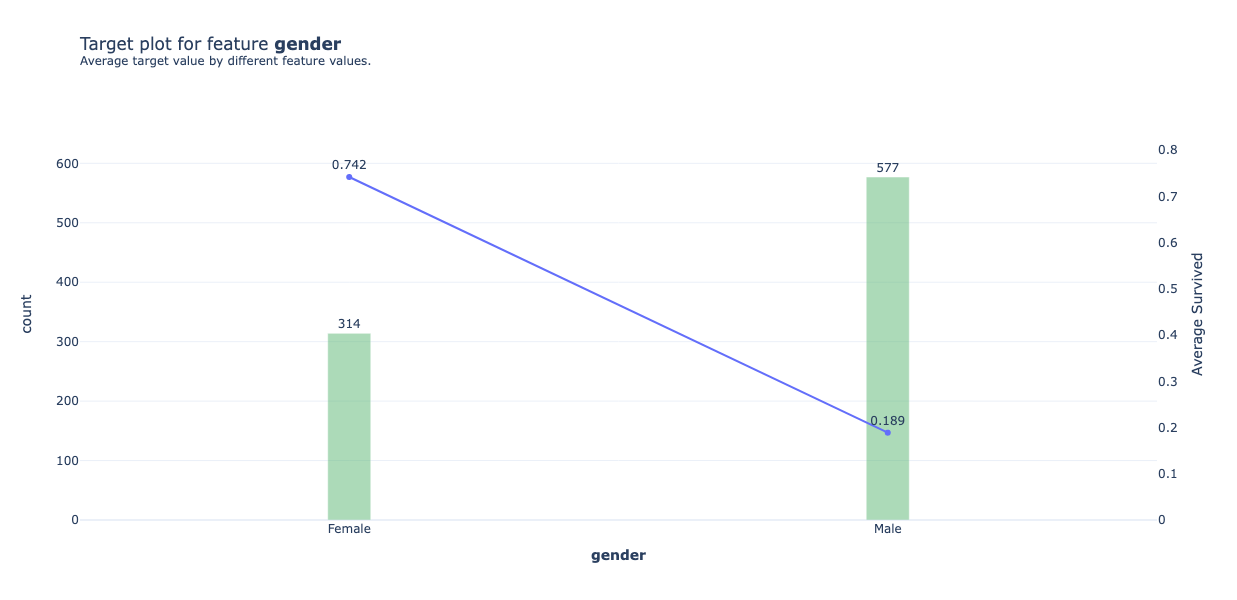

In [12]:
fig, axes, summary_df = target_gender.plot(
    figsize=None,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig.update_layout(xaxis=dict(ticktext=["Female", "Male"]))

In [13]:
summary_df

x  value  count  Survived
0  0  Sex_0    314  0.742038
1  1  Sex_1    577  0.188908

In [ ]:
fig, axes, summary_df = target_gender.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
)
_ = axes['bar_axes'][0].set_xticklabels(['Female', 'Male'])

## 1.2 check prediction distribution through feature 'Sex'

In [15]:
predict_gender = info_plots.PredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature="Sex",
    feature_name="gender",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

obtain pred_func from the provided model.


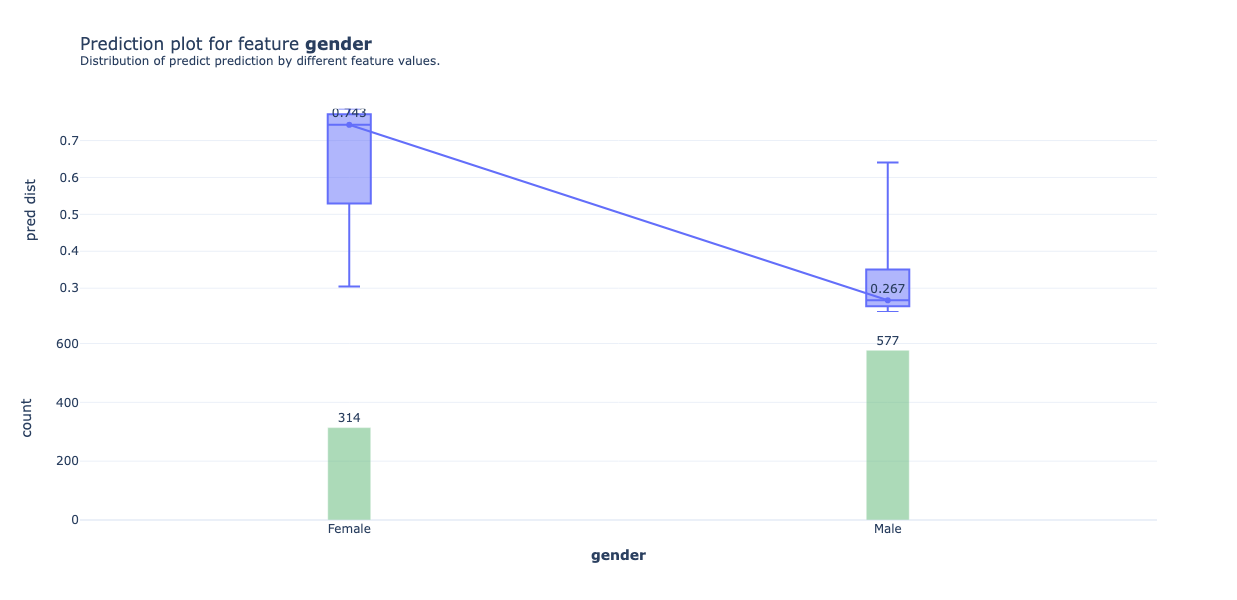

In [16]:
fig, axes, summary_df = predict_gender.plot(
    figsize=None,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig.update_xaxes(ticktext=["Female", "Male"])

In [17]:
summary_df

x  value  count   pred_q1   pred_q2   pred_q3
0  0  Sex_0    314  0.529746  0.742535  0.770870
1  1  Sex_1    577  0.251237  0.267264  0.350209

In [ ]:
fig, axes, summary_df = predict_gender.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
)
_ = axes['bar_axes'][0].set_xticklabels(['Female', 'Male'])

### pass in `pred_func`

In [ ]:
def titanic_predict_proba(model, X, predict_kwds={}):
    return model.predict_proba(X, **predict_kwds) + 0.05

predict_gender = info_plots.PredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature="Sex",
    feature_name="gender",
    pred_func=titanic_predict_proba,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

In [ ]:
fig, axes, summary_df = predict_gender.plot(
    figsize=None,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

## 1.3 pdp for feature 'Sex'

In [21]:
pdp_sex = pdp.PDPIsolate(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature="Sex",
    feature_name="gender",
)

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

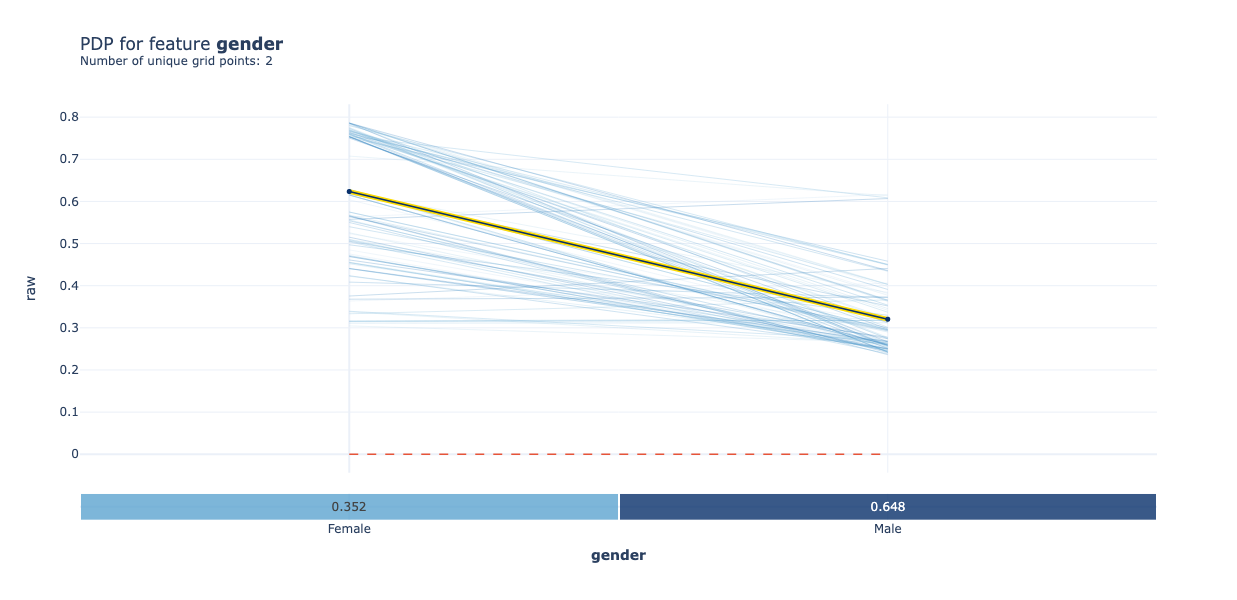

In [22]:
fig, axes = pdp_sex.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white',
)
fig.update_xaxes(ticktext=["Female", "Male"], row=2, col=1)

In [ ]:
fig, axes = pdp_sex.plot(
    center=True,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='matplotlib',
    template='plotly_white',
)
_ = axes['dist_axes'][0].set_xticklabels(['Female', 'Male'])

# 2. one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

## 2.1 target distribution through feature 'embarked'

In [24]:
target_embarked = info_plots.TargetPlot(
    df=titanic_data,
    feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'],
    feature_name="embarked",
    target=titanic_target,
)

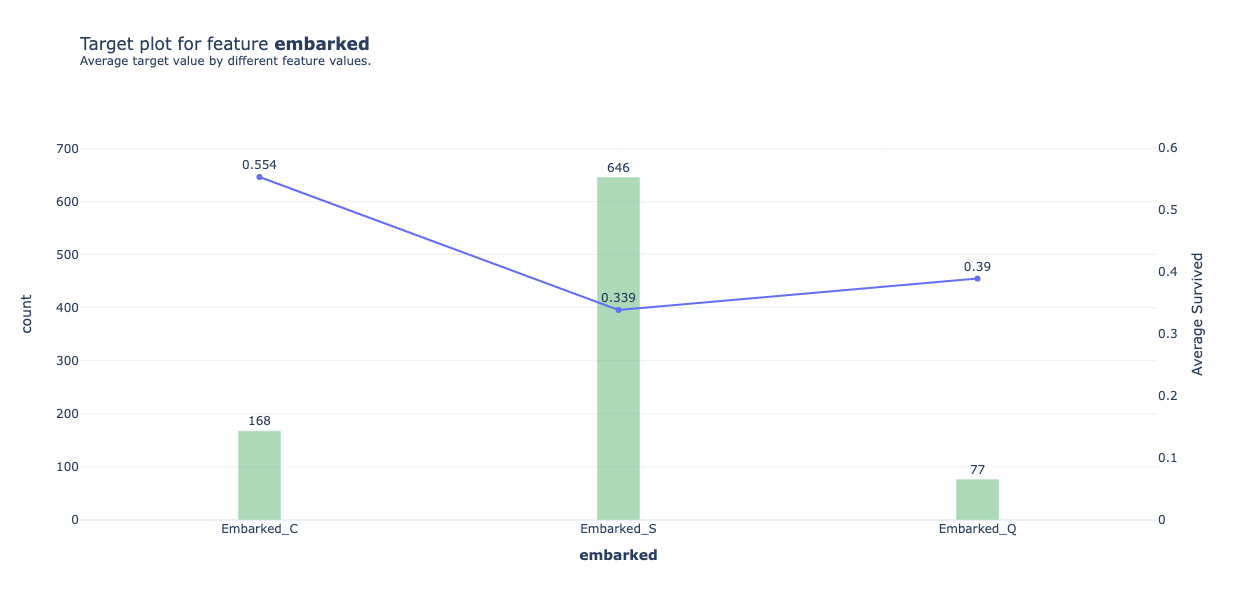

In [25]:
fig, axes, summary_df = target_embarked.plot(
    figsize=None,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [26]:
summary_df

x       value  count  Survived
0  0  Embarked_C    168  0.553571
1  1  Embarked_S    646  0.339009
2  2  Embarked_Q     77  0.389610

In [ ]:
fig, axes, summary_df = target_embarked.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
)

## 2.2 check prediction distribution through feature 'embarked'

In [28]:
predict_embarked = info_plots.PredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'],
    feature_name="embarked",
    pred_func=None,
    n_classes=None,
    predict_kwds={},
    chunk_size=-1,
)

obtain pred_func from the provided model.


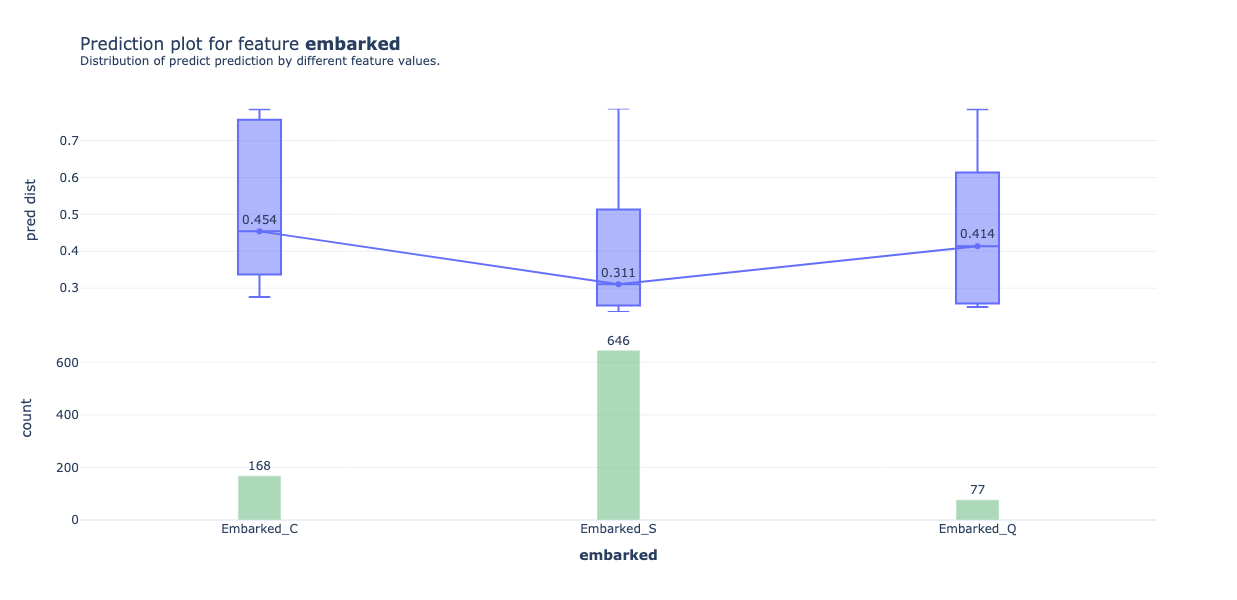

In [29]:
fig, axes, summary_df = predict_embarked.plot(
    figsize=None,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [30]:
summary_df

x       value  count   pred_q1   pred_q2   pred_q3
0  0  Embarked_C    168  0.337831  0.453932  0.755985
1  1  Embarked_S    646  0.253127  0.310692  0.512606
2  2  Embarked_Q     77  0.258811  0.413767  0.612809

In [ ]:
fig, axes, summary_df = predict_embarked.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
)

## 2.3 pdp for feature 'embarked'

In [32]:
pdp_embark = pdp.PDPIsolate(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'],
    feature_name="embarked",
)

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

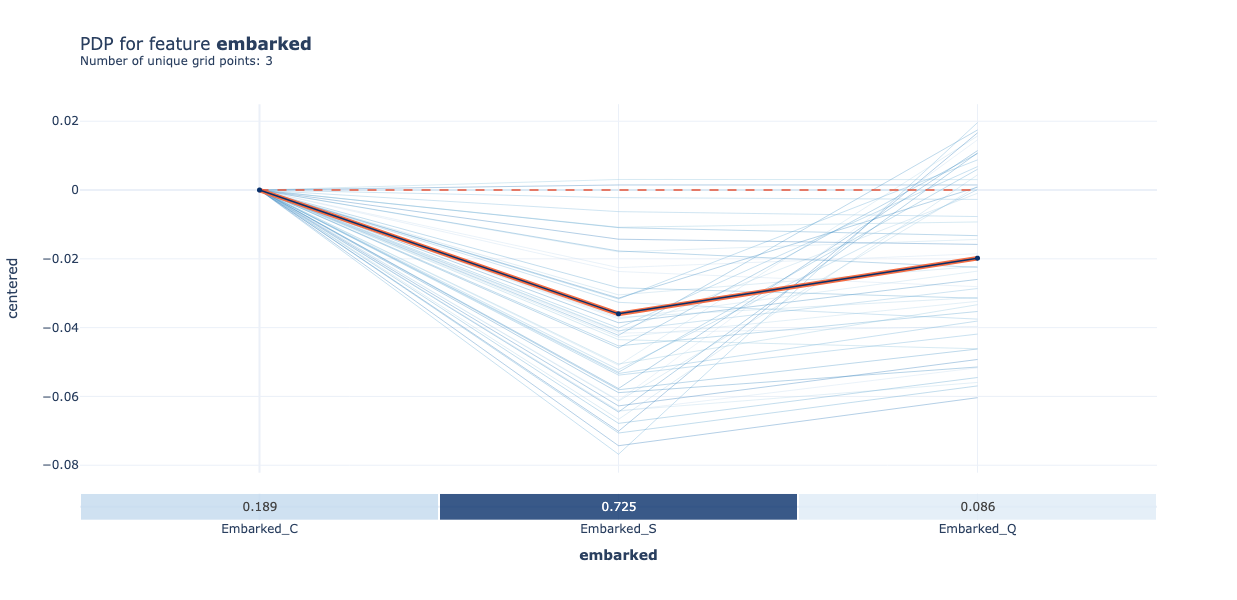

In [33]:
fig, axes = pdp_embark.plot(
    center=True,
    plot_lines=True,
    frac_to_plot=1,
    cluster=True,
    n_cluster_centers=50,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True, "line": {"hl_color": "#f46d43"}},
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes = pdp_embark.plot(
    center=False,
    plot_lines=True,
    frac_to_plot=1,
    cluster=True,
    n_cluster_centers=50,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True, "line": {"hl_color": "#f46d43"}},
    engine='matplotlib',
    template='plotly_white',
)

### pass in `data_transformer`
Since some features are highly correlated.

In [35]:
for col in ['Embarked_C', 'Embarked_S', 'Embarked_Q']:
    print(col, titanic_data[titanic_data[col] == 1]["Fare"].mean())

Embarked_C 59.95414404761905
Embarked_S 27.243651393188795
Embarked_Q 13.276029870129872


In [36]:
def data_trans(df):
    embarkeds = ['Embarked_C', 'Embarked_S', 'Embarked_Q']
    fares = [60, 28, 13]
    df["Fare"] = df[embarkeds].apply(lambda x: fares[np.argmax(x)], axis=1)
    return df

pdp_embark = pdp.PDPIsolate(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'],
    feature_name="embarked",
    data_transformer=data_trans,
)

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
fig, axes = pdp_embark.plot(
    center=True,
    plot_lines=True,
    frac_to_plot=1,
    cluster=True,
    n_cluster_centers=50,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=False,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True, "line": {"hl_color": "#f46d43"}},
    engine='plotly',
    template='plotly_white',
)
fig

# 3. numeric feature: Fare

## 3.1 target distribution through feature 'Fare'

In [38]:
target_fare = info_plots.TargetPlot(
    df=titanic_data,
    feature="Fare",
    feature_name="fare",
    target=titanic_target,
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoint=True,
)

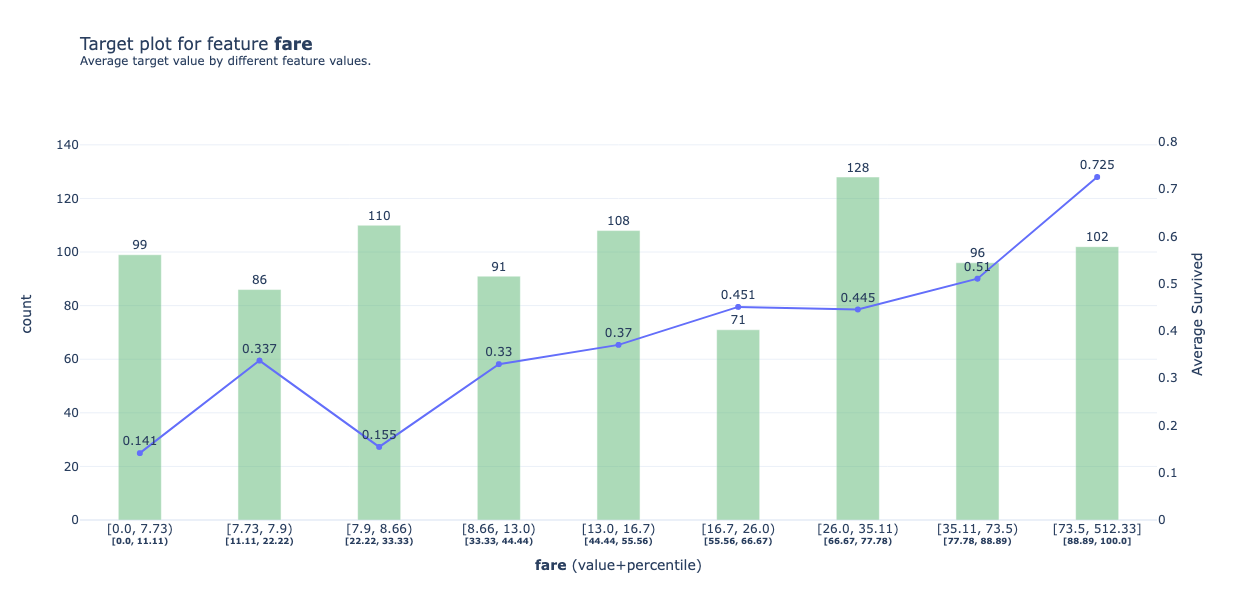

In [39]:
fig, axes, summary_df = target_fare.plot(
    show_percentile=True,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [40]:
summary_df

x           value      percentile  count  Survived
0  0     [0.0, 7.73)    [0.0, 11.11)     99  0.141414
1  1     [7.73, 7.9)  [11.11, 22.22)     86  0.337209
2  2     [7.9, 8.66)  [22.22, 33.33)    110  0.154545
3  3    [8.66, 13.0)  [33.33, 44.44)     91  0.329670
4  4    [13.0, 16.7)  [44.44, 55.56)    108  0.370370
5  5    [16.7, 26.0)  [55.56, 66.67)     71  0.450704
6  6   [26.0, 35.11)  [66.67, 77.78)    128  0.445312
7  7   [35.11, 73.5)  [77.78, 88.89)     96  0.510417
8  8  [73.5, 512.33]  [88.89, 100.0]    102  0.725490

In [ ]:
fig, axes, summary_df = target_fare.plot(
    show_percentile=True,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine="matplotlib",
)

## 3.2 check prediction distribution through feature 'Fare'

In [42]:
predict_fare = info_plots.PredictPlot(
    model=titanic_model,
    model_features=titanic_features,
    df=titanic_data,
    feature="Fare",
    feature_name="fare",
    pred_func=None,
    n_classes=None,
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoint=True,
    predict_kwds={},
    chunk_size=-1,
)

obtain pred_func from the provided model.


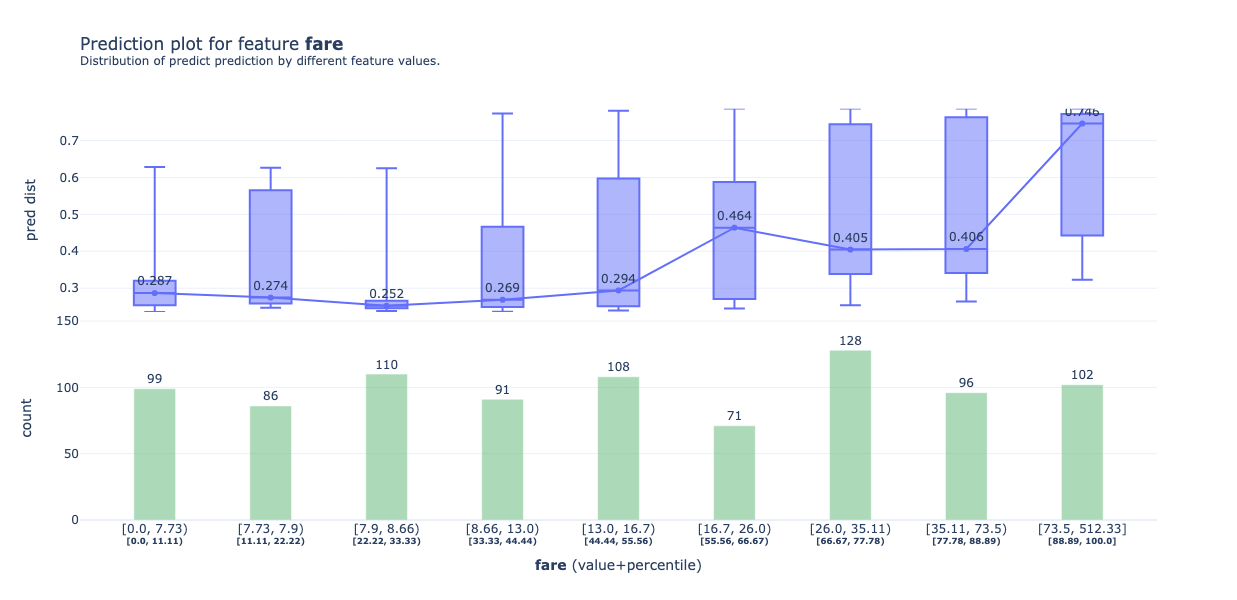

In [43]:
fig, axes, summary_df = predict_fare.plot(
    show_percentile=True,
    figsize=None,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [44]:
summary_df

x           value      percentile  count   pred_q1   pred_q2   pred_q3
0  0     [0.0, 7.73)    [0.0, 11.11)     99  0.253739  0.286751  0.317591
1  1     [7.73, 7.9)  [11.11, 22.22)     86  0.258811  0.274496  0.562648
2  2     [7.9, 8.66)  [22.22, 33.33)    110  0.245521  0.252387  0.265690
3  3    [8.66, 13.0)  [33.33, 44.44)     91  0.249461  0.268690  0.462660
4  4    [13.0, 16.7)  [44.44, 55.56)    108  0.250826  0.293962  0.588795
5  5    [16.7, 26.0)  [55.56, 66.67)     71  0.277722  0.463934  0.587410
6  6   [26.0, 35.11)  [66.67, 77.78)    128  0.338511  0.404576  0.742940
7  7   [35.11, 73.5)  [77.78, 88.89)     96  0.341277  0.406147  0.762725
8  8  [73.5, 512.33]  [88.89, 100.0]    102  0.443956  0.746002  0.771691

In [ ]:
fig, axes, summary_df = predict_fare.plot(
    show_percentile=True,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
)

## 3.3 pdp for feature 'Fare'

In [46]:
pdp_fare = pdp.PDPIsolate(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    feature="Fare",
    feature_name="fare",
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    cust_grid_points=None,
    grid_type='percentile',
    num_grid_points=10,
    percentile_range=None,
    grid_range=None,
)

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

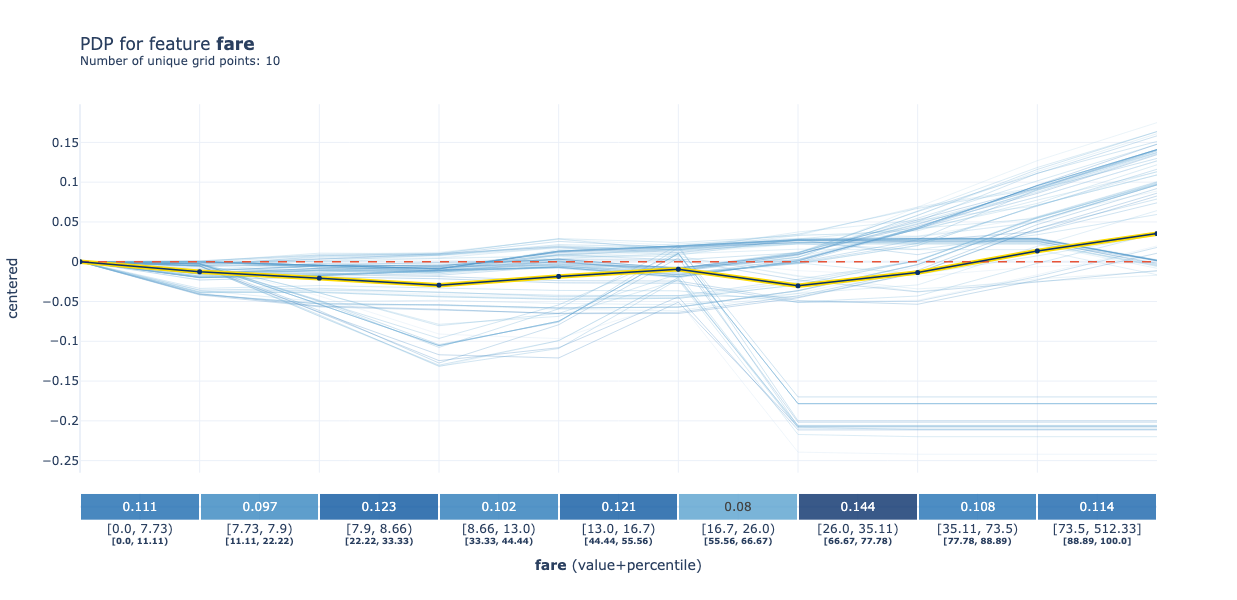

In [47]:
fig, axes = pdp_fare.plot(
    center=True,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params={"pdp_hl": True},
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes = pdp_fare.plot(
    center=True,
    plot_lines=True,
    frac_to_plot=100,
    cluster=False,
    n_cluster_centers=None,
    cluster_method='accurate',
    plot_pts_dist=True,
    to_bins=False,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

# 4. Interaction between two variables

## 4.1 'Age' and 'Fare'

### 4.1.1 InteractTargetPlot 

In [49]:
target_age_fare = info_plots.InteractTargetPlot(
    df=titanic_data,
    features=["Age", "Fare"],
    feature_names=["Age", "Fare"],
    target=titanic_target,
    num_grid_points=10,
    grid_types="percentile",
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
)

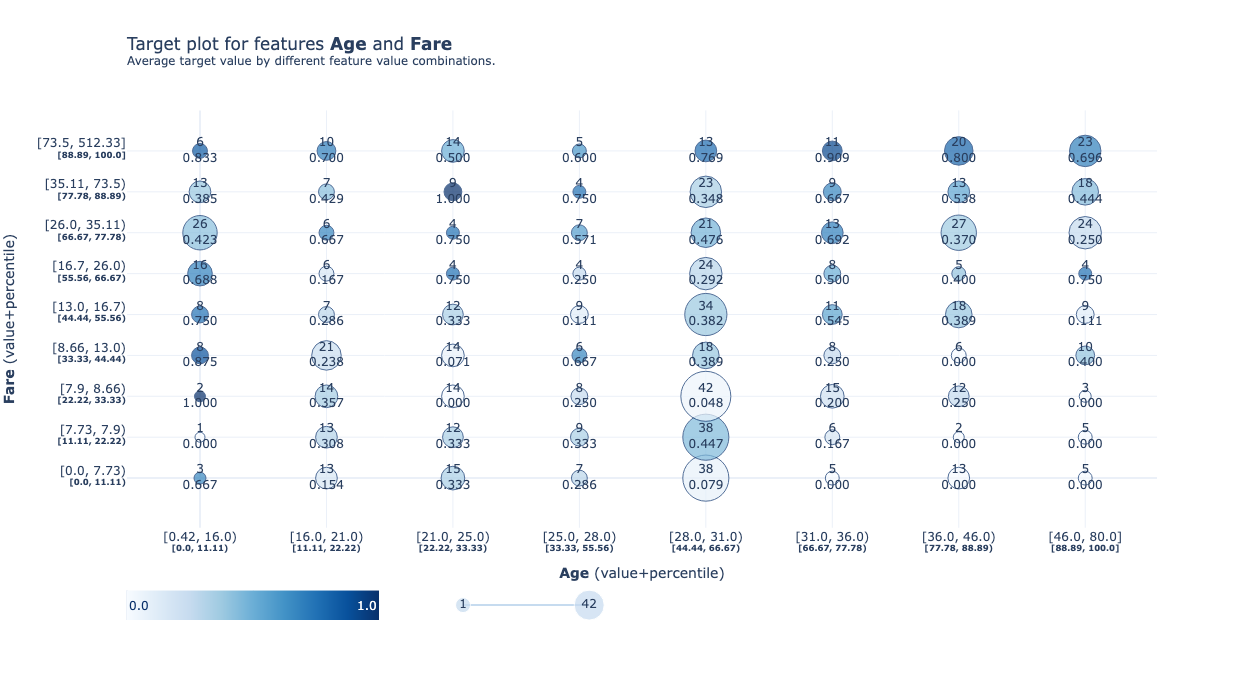

In [50]:
fig, axes, summary_df = target_age_fare.plot(
    show_percentile=True,
    figsize=(1200, 700),
    annotate=True,
    engine='plotly',
    template='plotly_white',
)
fig

In [51]:
summary_df.head()

x1  x2       value_1       value_2  percentile_1    percentile_2  count  \
0   0   0  [0.42, 16.0)   [0.0, 7.73)  [0.0, 11.11)    [0.0, 11.11)      3   
1   0   1  [0.42, 16.0)   [7.73, 7.9)  [0.0, 11.11)  [11.11, 22.22)      1   
2   0   2  [0.42, 16.0)   [7.9, 8.66)  [0.0, 11.11)  [22.22, 33.33)      2   
3   0   3  [0.42, 16.0)  [8.66, 13.0)  [0.0, 11.11)  [33.33, 44.44)      8   
4   0   4  [0.42, 16.0)  [13.0, 16.7)  [0.0, 11.11)  [44.44, 55.56)      8   

   Survived  
0  0.666667  
1  0.000000  
2  1.000000  
3  0.875000  
4  0.750000

In [ ]:
fig, axes, summary_df = target_age_fare.plot(
    show_percentile=True,
    figsize=(16, 10),
    dpi=300,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
)

### 4.1.2 InteractPredictPlot

In [53]:
predict_age_fare = info_plots.InteractPredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Age", "Fare"],
    feature_names=["Age", "Fare"],
    pred_func=None,
    n_classes=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
    predict_kwds={},
    chunk_size=-1,
)

obtain pred_func from the provided model.


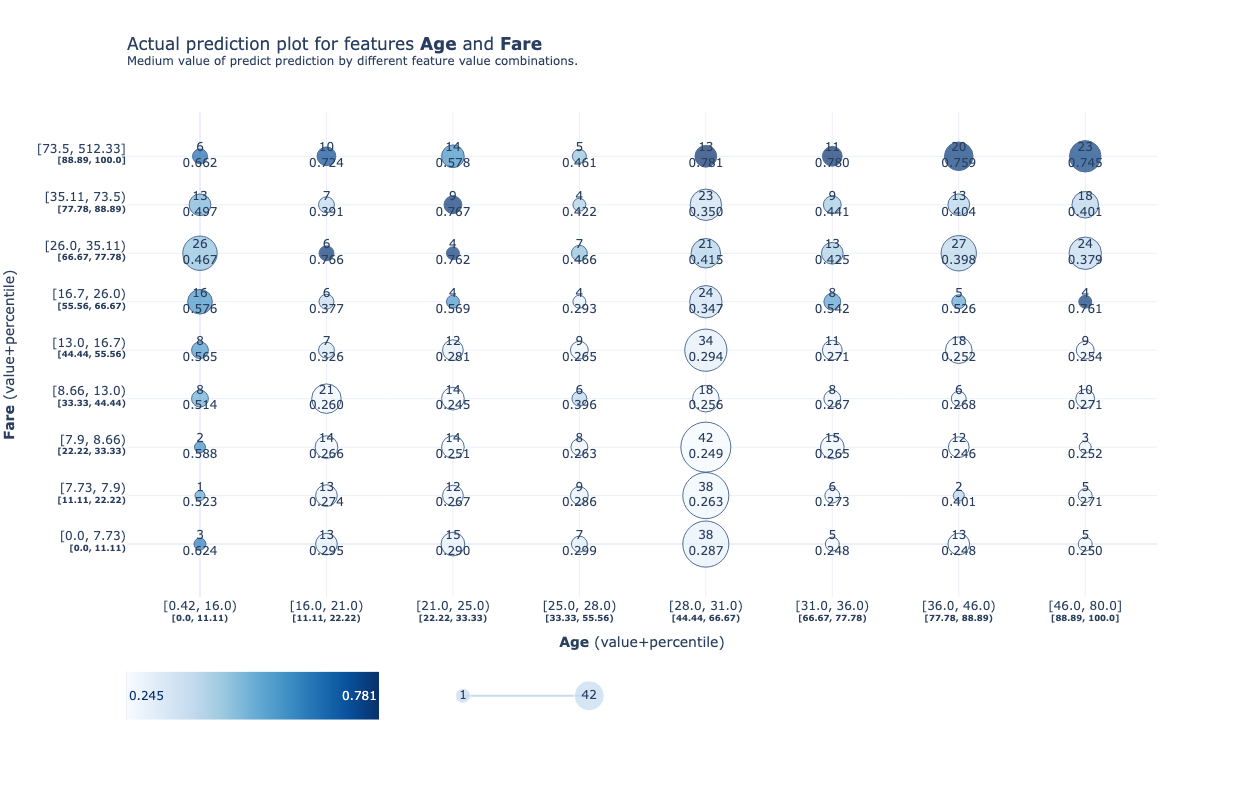

In [54]:
fig, axes, summary_df = predict_age_fare.plot(
    show_percentile=True,
    figsize=(1200, 800),
    ncols=2,
    annotate=True,
    plot_params={"subplot_ratio": {"y": [10, 1]}},
    engine='plotly',
    template='plotly_white',
)
fig

In [55]:
summary_df.head()

x1  x2       value_1       value_2  percentile_1    percentile_2  count  \
0   0   0  [0.42, 16.0)   [0.0, 7.73)  [0.0, 11.11)    [0.0, 11.11)      3   
1   0   1  [0.42, 16.0)   [7.73, 7.9)  [0.0, 11.11)  [11.11, 22.22)      1   
2   0   2  [0.42, 16.0)   [7.9, 8.66)  [0.0, 11.11)  [22.22, 33.33)      2   
3   0   3  [0.42, 16.0)  [8.66, 13.0)  [0.0, 11.11)  [33.33, 44.44)      8   
4   0   4  [0.42, 16.0)  [13.0, 16.7)  [0.0, 11.11)  [44.44, 55.56)      8   

       pred  
0  0.623744  
1  0.523373  
2  0.587743  
3  0.514344  
4  0.565033

In [ ]:
fig, axes, summary_df = predict_age_fare.plot(
    show_percentile=True,
    figsize=(16, 10),
    dpi=300,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
)

### 4.1.3 PDPInteract

In [57]:
pdp_age_fare = pdp.PDPInteract(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Age", "Fare"],
    feature_names=["age", "fare"],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
)

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/90 [00:00<?, ?it/s]

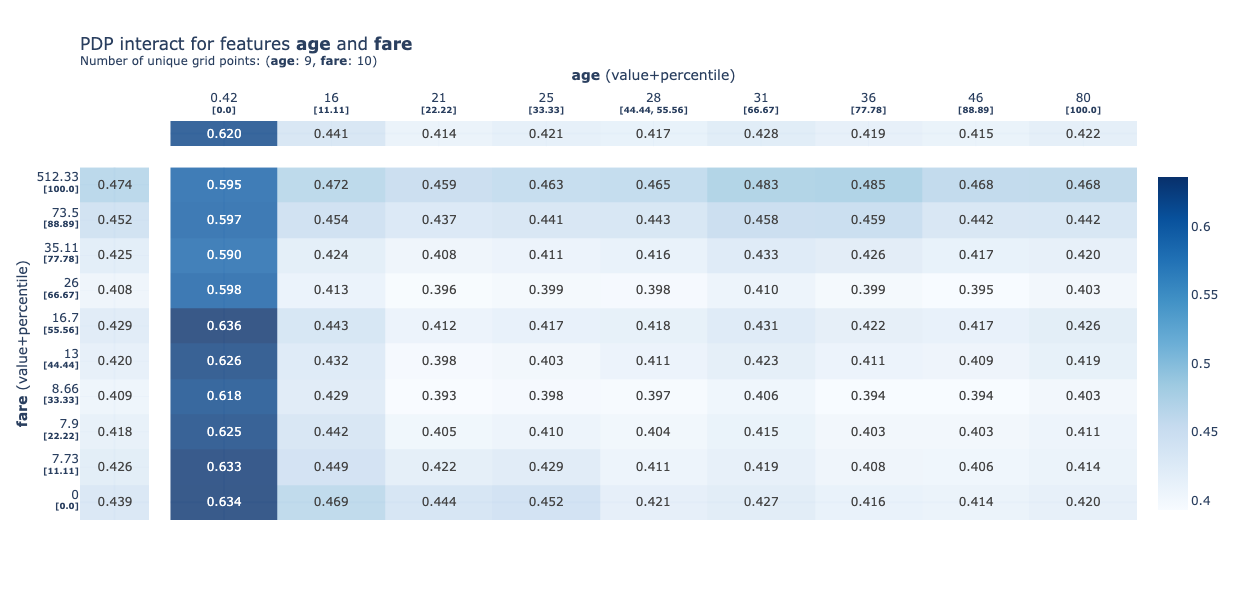

In [90]:
fig, axes = pdp_age_fare.plot(
    plot_type="grid",
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes = pdp_age_fare.plot(
    plot_type='grid',
    plot_pdp=True,
    to_bins=False,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

## 4.2 'Age' and 'Sex'

### 4.2.1 InteractTargetPlot

In [60]:
target_age_gender = info_plots.InteractTargetPlot(
    df=titanic_data,
    features=["Age", "Sex"],
    feature_names=["age", "gender"],
    target=titanic_target,
    num_grid_points=10,
    grid_types="percentile",
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
)

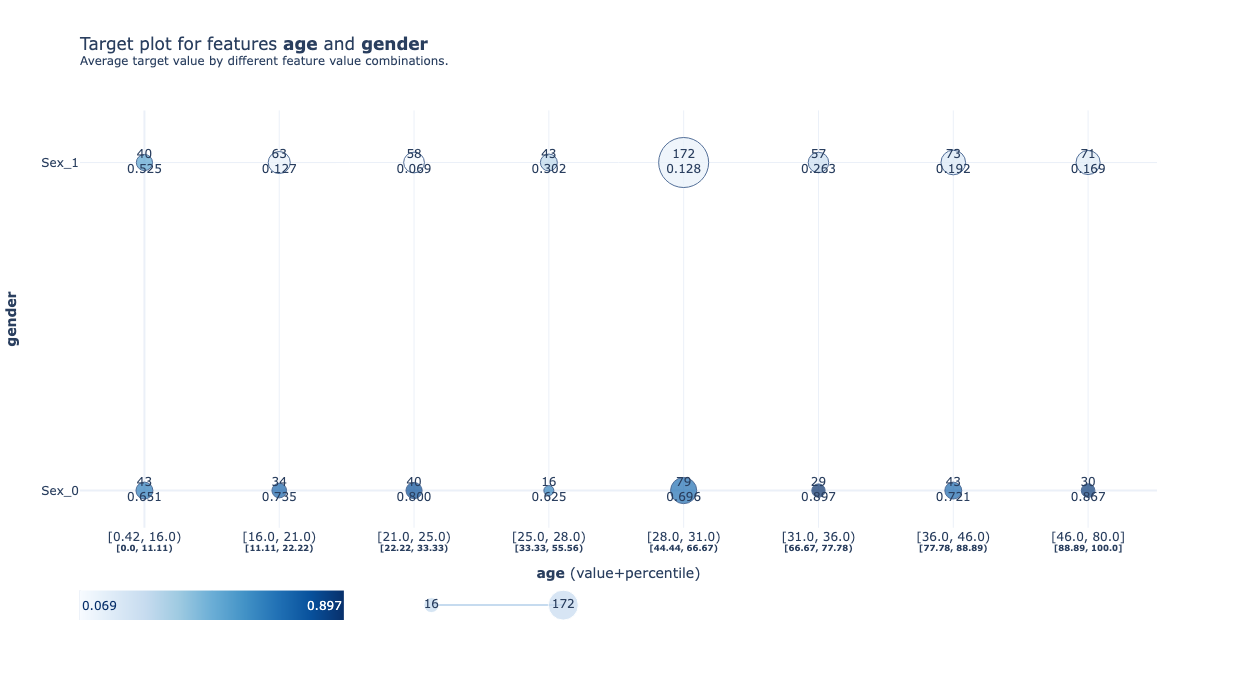

In [61]:
fig, axes, summary_df = target_age_gender.plot(
    show_percentile=True,
    figsize=(1200, 700),
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [62]:
summary_df.head()

x1  x2       value_1 value_2    percentile_1  count  Survived
0   0   0  [0.42, 16.0)   Sex_0    [0.0, 11.11)     43  0.651163
1   0   1  [0.42, 16.0)   Sex_1    [0.0, 11.11)     40  0.525000
2   1   0  [16.0, 21.0)   Sex_0  [11.11, 22.22)     34  0.735294
3   1   1  [16.0, 21.0)   Sex_1  [11.11, 22.22)     63  0.126984
4   2   0  [21.0, 25.0)   Sex_0  [22.22, 33.33)     40  0.800000

In [ ]:
fig, axes, summary_df = target_age_gender.plot(
    show_percentile=True,
    figsize=None,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

### 4.2.2 InteractPredictPlot

In [64]:
predict_age_gender = info_plots.InteractPredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Age", "Sex"],
    feature_names=["age", "gender"],
    pred_func=None,
    n_classes=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
    predict_kwds={},
    chunk_size=-1,
)

obtain pred_func from the provided model.


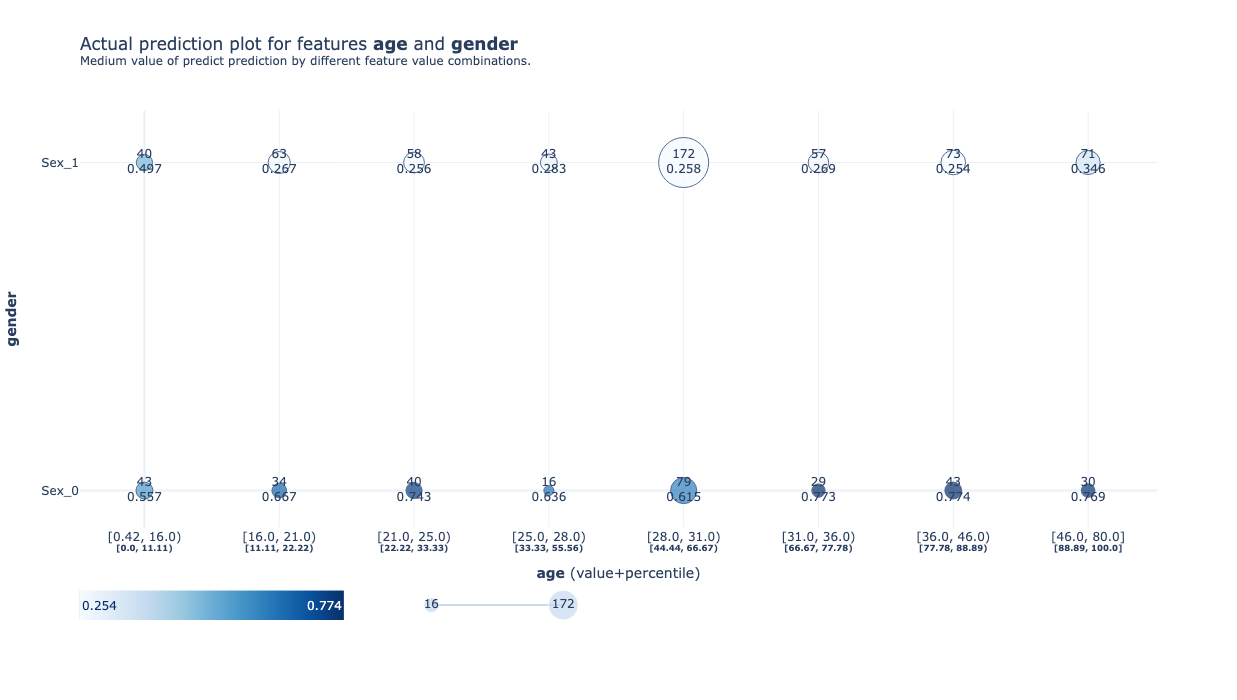

In [65]:
fig, axes, summary_df = predict_age_gender.plot(
    show_percentile=True,
    figsize=(1200, 700),
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [66]:
summary_df.head()

x1  x2       value_1 value_2    percentile_1  count      pred
0   0   0  [0.42, 16.0)   Sex_0    [0.0, 11.11)     43  0.557419
1   0   1  [0.42, 16.0)   Sex_1    [0.0, 11.11)     40  0.497046
2   1   0  [16.0, 21.0)   Sex_0  [11.11, 22.22)     34  0.666870
3   1   1  [16.0, 21.0)   Sex_1  [11.11, 22.22)     63  0.267253
4   2   0  [21.0, 25.0)   Sex_0  [22.22, 33.33)     40  0.742786

In [ ]:
fig, axes, summary_df = predict_age_gender.plot(
    show_percentile=True,
    figsize=None,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

### 4.2.3 PDPInteract

In [68]:
pdp_age_gender = pdp.PDPInteract(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Age", "Sex"],
    feature_names=["age", "gender"],
    pred_func=None,
    n_classes=None,
    memory_limit=0.5,
    chunk_size=-1,
    n_jobs=1,
    predict_kwds={},
    data_transformer=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
)

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/18 [00:00<?, ?it/s]

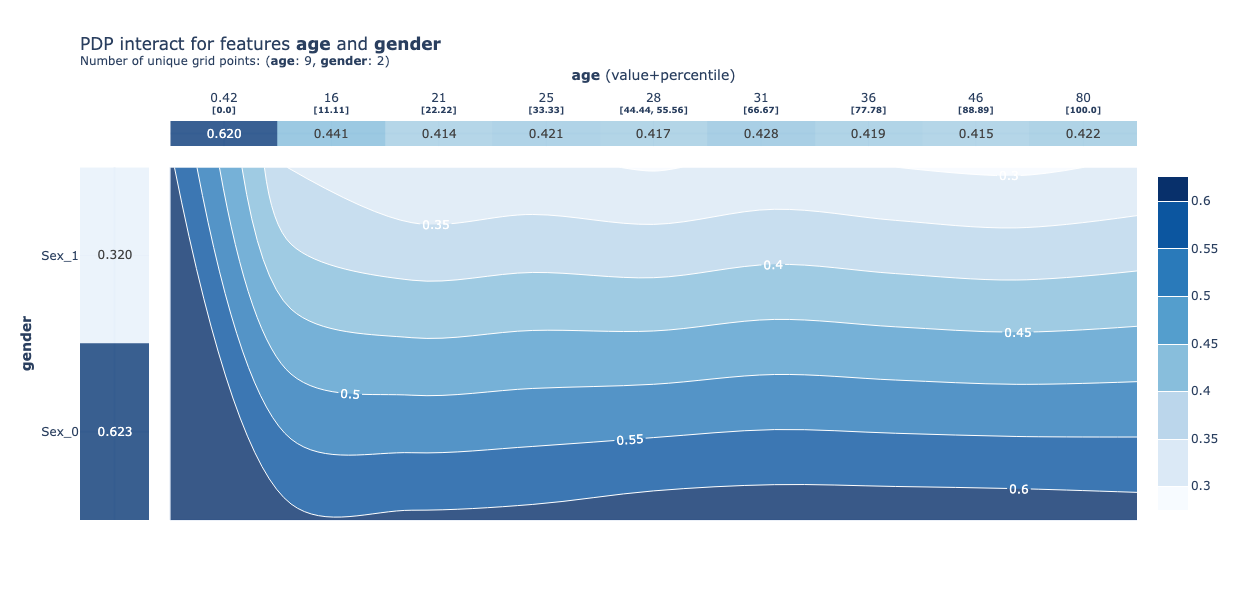

In [69]:
fig, axes = pdp_age_gender.plot(
    plot_type='contour',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes = pdp_age_gender.plot(
    plot_type='grid',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    which_classes=None,
    figsize=None,
    dpi=300,
    ncols=2,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

## 4.3 'Age' and 'Embarked'

### 4.3.1 InteractTargetPlot

In [71]:
target_age_embarked = info_plots.InteractTargetPlot(
    df=titanic_data,
    features=["Age", ['Embarked_C', 'Embarked_S', 'Embarked_Q']],
    feature_names=["Age", "Embarked"],
    target=titanic_target,
    num_grid_points=10,
    grid_types="percentile",
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
)

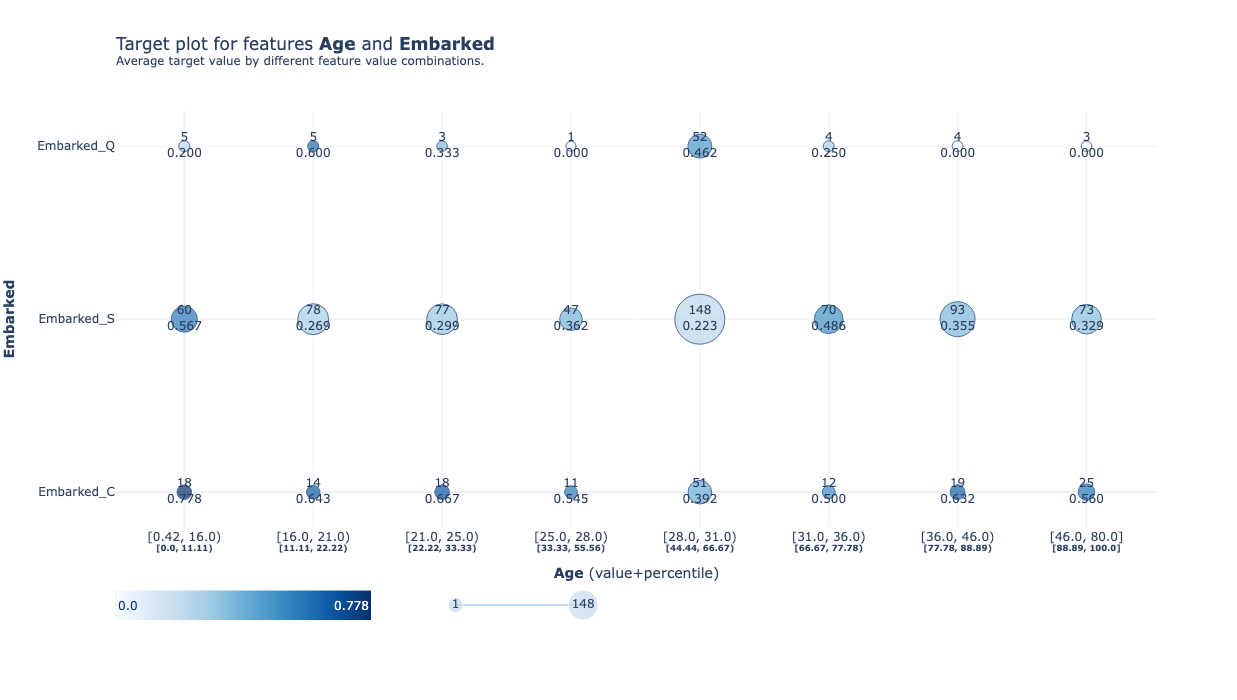

In [72]:
fig, axes, summary_df = target_age_embarked.plot(
    show_percentile=True,
    figsize=(1200, 700),
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes, summary_df = target_age_embarked.plot(
    show_percentile=True,
    figsize=None,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

### 4.3.2 InteractPredictPlot

In [74]:
predict_age_embarked = info_plots.InteractPredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Age", ['Embarked_C', 'Embarked_S', 'Embarked_Q']],
    feature_names=["Age", "Embarked"],
    pred_func=None,
    n_classes=None,
    num_grid_points=10,
    grid_types='percentile',
    percentile_ranges=None,
    grid_ranges=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoints=True,
    predict_kwds={},
    chunk_size=-1,
)

obtain pred_func from the provided model.


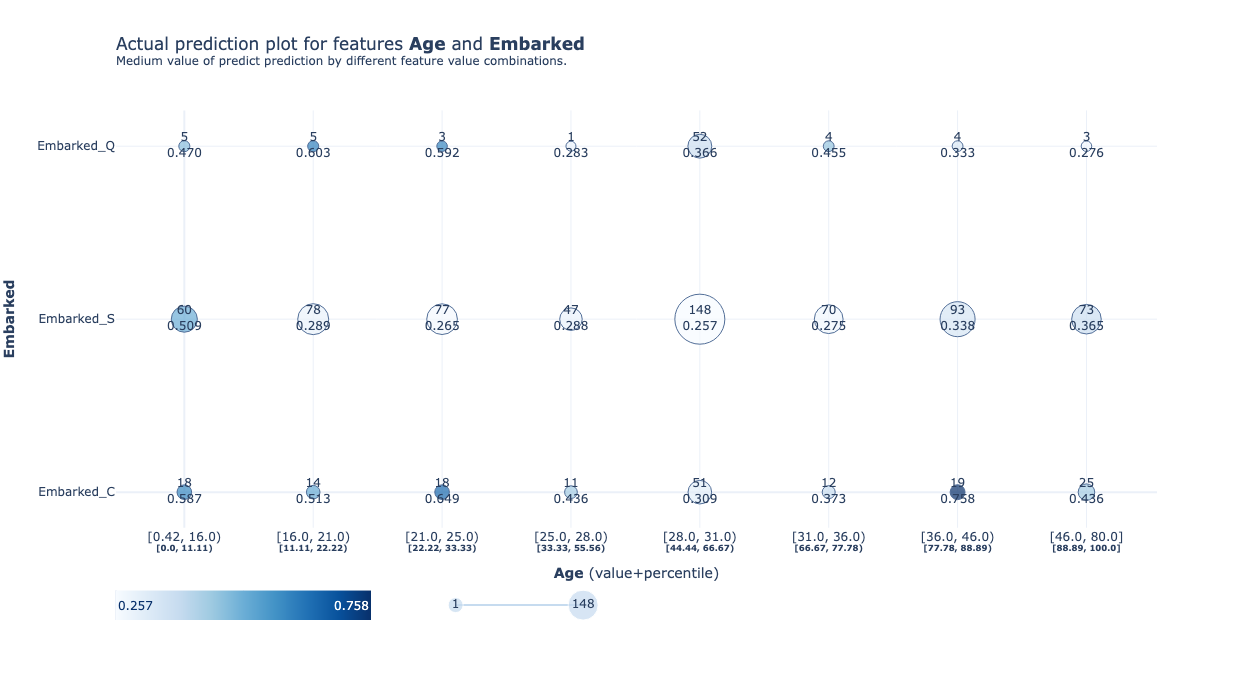

In [75]:
fig, axes, summary_df = predict_age_embarked.plot(
    show_percentile=True,
    figsize=(1200, 700),
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes, summary_df = predict_age_embarked.plot(
    show_percentile=True,
    figsize=None,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

### 4.3.3 PDPInteract

In [77]:
pdp_embark_age = pdp.PDPInteract(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Age", ['Embarked_C', 'Embarked_S', 'Embarked_Q']],
    feature_names=["Age", "Embarked"],
)

obtain pred_func from the provided model.


  0%|          | 0/9 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/27 [00:00<?, ?it/s]

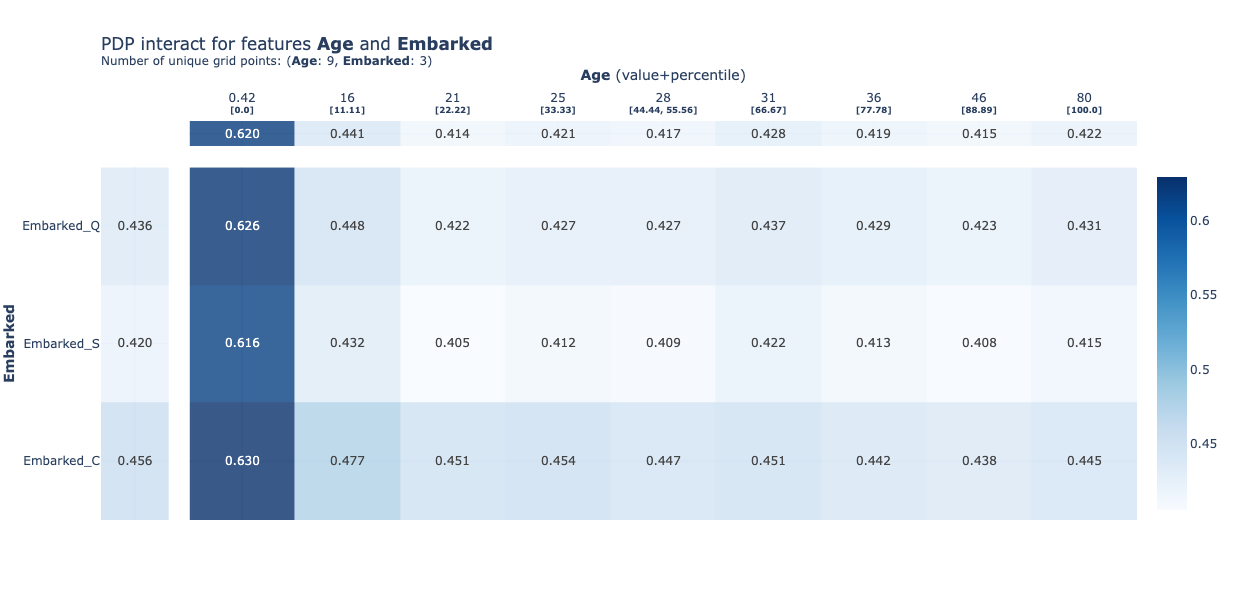

In [78]:
fig, axes = pdp_embark_age.plot(
    plot_type="grid",
    plot_pdp=True,
    show_percentile=True,
    engine="plotly",
    template="plotly_white",
)
fig

In [ ]:
fig, axes = pdp_embark_age.plot(
    plot_type="grid",
    plot_pdp=True,
    show_percentile=True,
    engine="matplotlib",
    template="plotly_white",
)

## 4.4 'Sex' and 'Embarked'

### 4.4.1 InteractTargetPlot

In [80]:
target_gender_embarked = info_plots.InteractTargetPlot(
    df=titanic_data,
    features=["Sex", ['Embarked_C', 'Embarked_S', 'Embarked_Q']],
    feature_names=["gender", "embarked"],
    target=titanic_target,
)

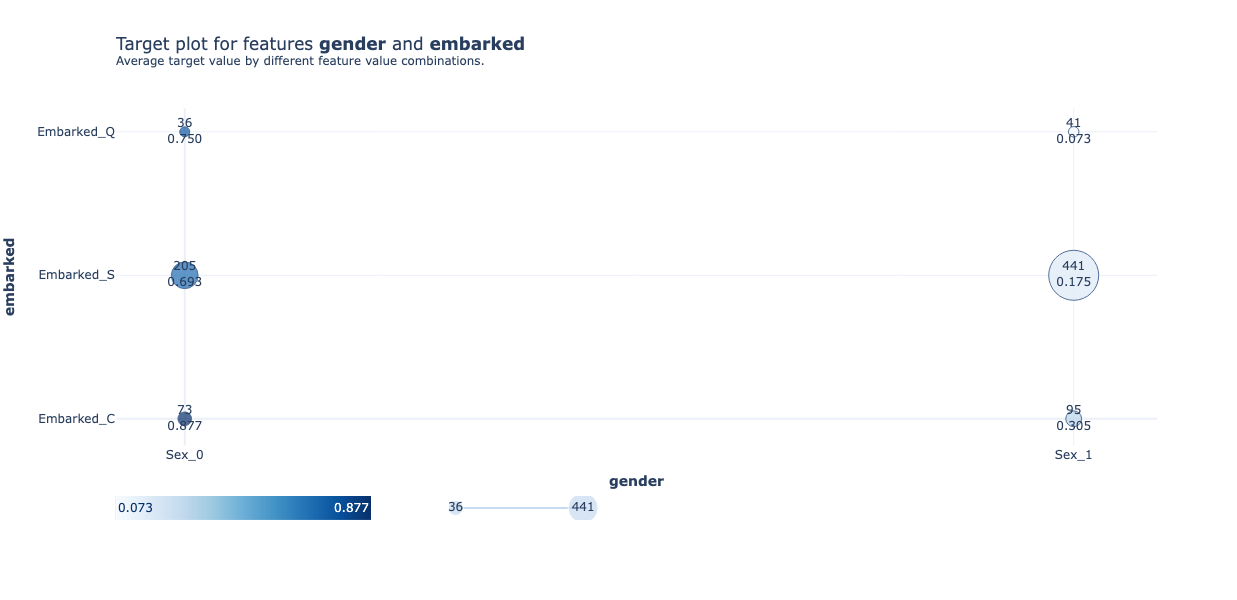

In [81]:
fig, axes, summary_df = target_gender_embarked.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [82]:
summary_df

x1  x2 value_1     value_2  count  Survived
0   0   0   Sex_0  Embarked_C     73  0.876712
1   0   1   Sex_0  Embarked_S    205  0.692683
2   0   2   Sex_0  Embarked_Q     36  0.750000
3   1   0   Sex_1  Embarked_C     95  0.305263
4   1   1   Sex_1  Embarked_S    441  0.174603
5   1   2   Sex_1  Embarked_Q     41  0.073171

In [ ]:
fig, axes, summary_df = target_gender_embarked.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

### 4.4.2 InteractPredictPlot

In [84]:
predict_gender_embarked = info_plots.InteractPredictPlot(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Sex", ['Embarked_C', 'Embarked_S', 'Embarked_Q']],
    feature_names=["gender", "embarked"],
)

obtain pred_func from the provided model.


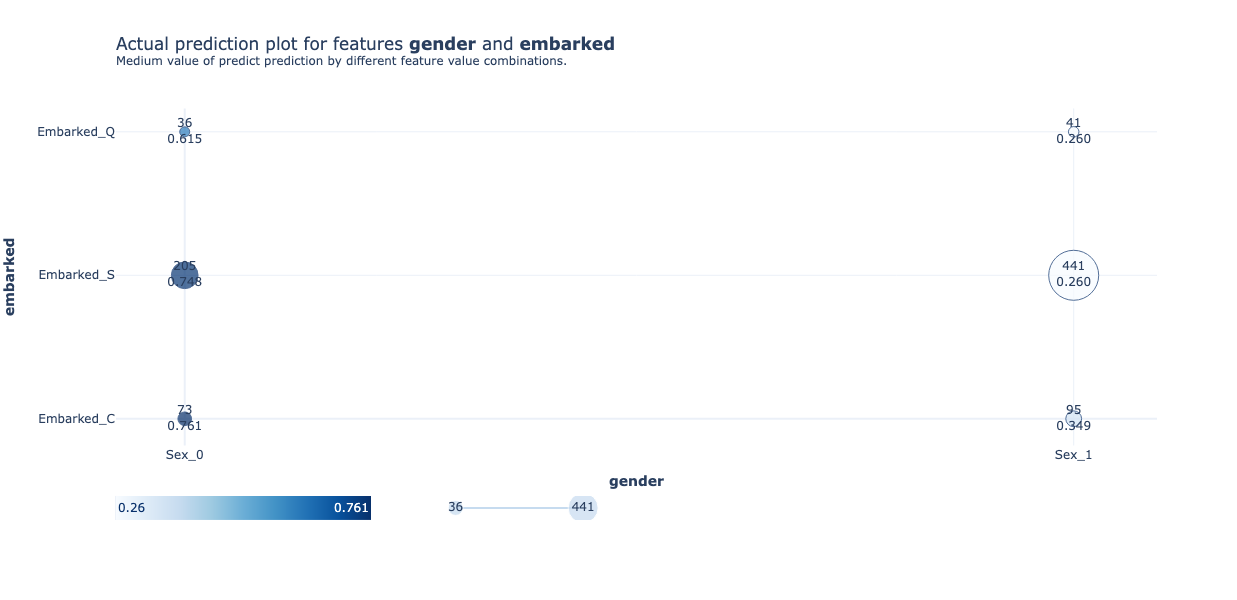

In [85]:
fig, axes, summary_df = predict_gender_embarked.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='plotly',
    template='plotly_white',
)
fig

In [ ]:
fig, axes, summary_df = predict_gender_embarked.plot(
    figsize=None,
    dpi=300,
    ncols=2,
    annotate=True,
    plot_params=None,
    engine='matplotlib',
    template='plotly_white',
)

### 4.4.3 PDPInteract

In [87]:
pdp_gender_embark = pdp.PDPInteract(
    model=titanic_model,
    df=titanic_data,
    model_features=titanic_features,
    features=["Sex", ['Embarked_C', 'Embarked_S', 'Embarked_Q']],
    feature_names=["gender", "embarked"],
)

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/3 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/6 [00:00<?, ?it/s]

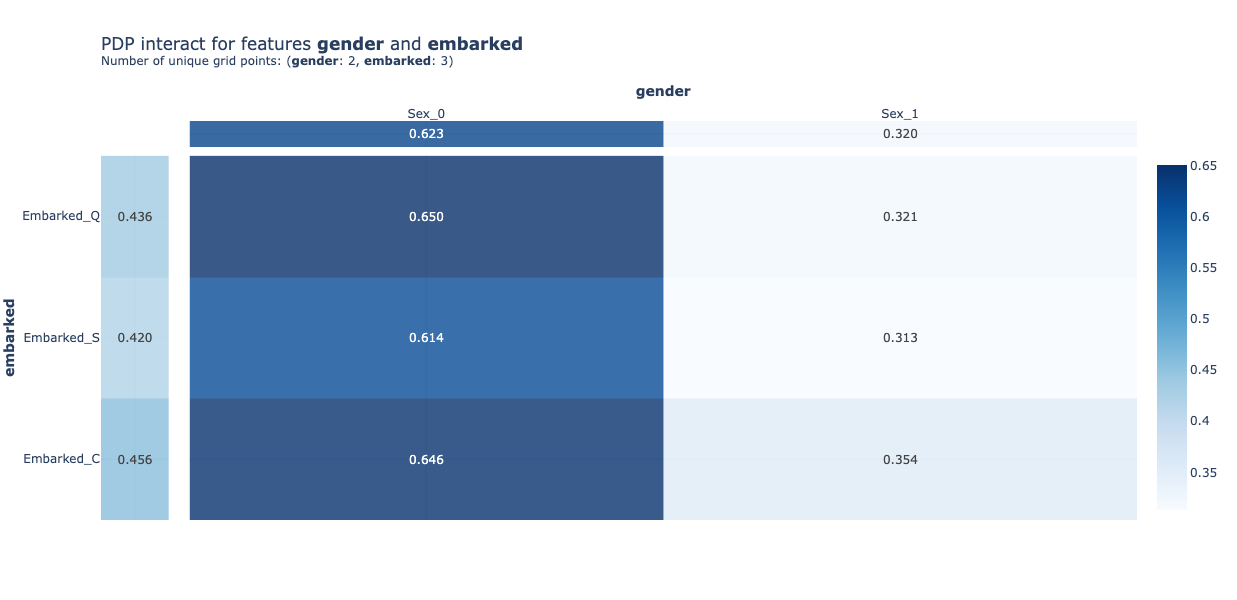

In [88]:
fig, axes = pdp_gender_embark.plot(
    plot_type="grid",
    plot_pdp=True,
    engine="plotly",
    template="plotly_white",
)
fig

In [ ]:
fig, axes = pdp_gender_embark.plot(
    plot_type="grid",
    plot_pdp=True,
    engine="matplotlib",
    template="plotly_white",
)